<a href="https://colab.research.google.com/github/mateocapon/simulacion_tp1/blob/main/TP2_Ejercicio_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejercicio 4

Se desea simular la evolución de una epidemia utilizando el modelo S.I.R.
Se conoce que inicialmente el 3% de la población se encuentra infectada, toda la población es susceptible de
contagiarse, la tasa de transmisión β=0,27, y la tasa de recuperación γ = 0,043


Se pide:
- Implementar el modelo SIR correspondiente.
- Graficar las curvas de porcentajes de personas sanas, infectadas y recuperadas, de forma que se vea la evolución
de la epidemia.
- Sabiendo que el sistema de salud puede asistir cómo máximo sólo al 30% de la población a la vez, determine la
duración total de la epidemia si se quiere que el pico máximo de infectados no supere las capacidades de
asistencia médica. ¿Qué parámetros modifica? ¿Por qué?


Pruebe con 3 distintos juegos de parámetros del modelo y comente los comportamientos explorados.

#Modelo SIR


##Variables 

S(t): Susceptibles

I(t): Infectados

R(t): Recuperados 

Infectados iniciales: 3%

Susceptibles iniciales: 97% (toda la población que no esta ya infectada)

Recuperados iniciales: 0%

## Ecuaciones Diferenciales del Modelo


$ \frac{\mathrm dS} {\mathrm dt} = -\beta SI\ $

$ \frac{\mathrm dI} {\mathrm dt} = \beta SI-\gamma I\ $

$ \frac{\mathrm dR} {\mathrm dt} = \gamma I\ $


##Parametros

$ \beta $ : tasa de transmisión

$ \gamma $: tasa de recuperación

$ \frac{1} {\gamma} $: período medio de recuperación 

### Valores

$ \gamma = 0.043 $

$ \beta = 0.27 $

Entonces el periodo medio de recuperacion es de : $ \frac{1} {\gamma} =  \frac{1} {0.043} = 23.25$ dias

##Implementacion del modelo del SIR utilizando RK4

In [8]:
# RK4
import numpy as np

def modelo_SIR(x, beta, gamma, n):
  #x(0) = S, x(1) = I,  x(2) = R
  xp = np.zeros((3, 1))
  xp[0] = -beta*x[0][n-1]*x[1][n-1]
  xp[1] = beta*x[0][n-1]*x[1][n-1] - gamma*x[1][n-1]
  xp[2] = gamma*x[1][n-1]

  return xp


def RK4(  x0, h, T , beta, gamma):
  t0 = T[0]
  tf = T[len(T)-1]

  N = round((tf-t0)/h) #Numero de pasos total
  t = np.zeros(N)

  x = np.zeros((3, N))

  t[0] = t0

  x=np.array(np.zeros((3, N)))
  x = np.delete(x, 0, axis=1)
  x = np.insert(x,0,x0,axis=1)
  
  for n in range(1, N):

    k1 = h* modelo_SIR( x, beta, gamma, n)
    k2 = h* modelo_SIR( x + 0.5*k1,beta, gamma, n)
    k3 = h* modelo_SIR( x + 0.5*k2, beta, gamma,n)
    k4 = h* modelo_SIR( x + k3, beta, gamma,n)

    k=(1/6)*(k1 + 2*k2 + 2*k3 + k4)

    for i in range(0, 3):
      x[i][n]=x[i][n-1]+k[i]

    t[n] = t[n-1] + h

  return x



##Simulacion de la epidemia

In [9]:
import matplotlib.pyplot as plt

def graficar_curvas(I,S,R,M):
  fig, ax = plt.subplots(figsize = (10,6))
  ax.plot(M, color = 'black', label = 'Capacidad Sistema Medico')
  ax.plot(S, color = 'blue', label = 'Susceptibles')
  ax.plot(I, color = 'red', label = 'Infectados')
  ax.plot(R, color = 'green', label = 'Recuperados')
  plt.title("Evolucion de Enfermedad")
  ax.set_xlabel('Dias')
  ax.set_ylabel('Poblacion')
  plt.legend()
  plt.grid()
  plt.show()


def duracion_epidemia(I,N):
  indice=-1
  i=0
  while( round(I[i], 5) != 0):
    i+=1
    if( i==(N-1)):break
  indice=i

  return indice

Grafico Evolución de Epidemia con parametros del Ejercicio 


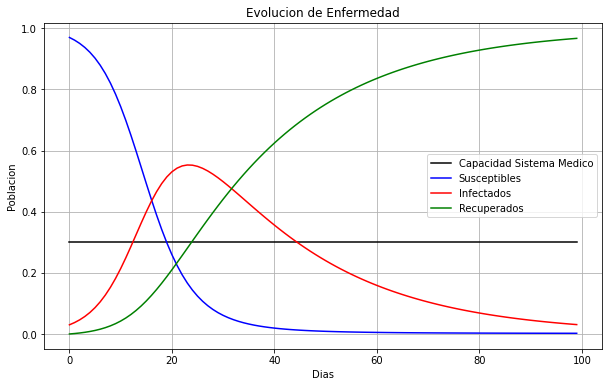

Máximo de infectados 0.55282
Máximo de infectados para que no sature el sistema medico es: 0.3
La poblacion final se conserva


In [10]:
# Simulacion de un modelo de epidemias SIR
import numpy as np

# Condiciones iniciales
S0=1-0.03
I0=0.03
R0 = 0
T0 = S0 + I0 + R0
x=[S0,I0,R0]
h = 1 #avanzamos de a 1 dia
tiempo=(0,100)
N=tiempo[-1]
Resultados =np.array(np.zeros((3, N)))

S=[]
I=[]
R=[]
M=[0.3*T0]*N

# Grafico Evolución de Epidemia con parametros del Ejercicio 
beta= 0.27
gamma = 0.043

Resultados = RK4(x , h, tiempo,beta,gamma)

S=Resultados[0]
I=Resultados[1]
R=Resultados[2]

print("Grafico Evolución de Epidemia con parametros del Ejercicio ")

graficar_curvas(I,S,R,M)

#amplitud del pico
max_infect=max(I)
print("Máximo de infectados",round(max_infect,5))
print("Máximo de infectados para que no sature el sistema medico es:", 0.3*T0)

poblacion_final=S[N-1]+R[N-1]+I[N-1]
if (round(poblacion_final) == T0):
  print("La poblacion final se conserva")
else:
    print("La poblacion final es de",poblacion_final)


Una forma de dismunuir la curva de infectados, seria bajando el nivel de contacto $\beta$

Esto se debe a que al haber menor numero de contacto en la población, esta se infecta a un paso mucho menor, lo cual logra el objetivo de no saturar la capacidad del sistema medico.


Otra forma de disminuir la curva de infectados, sería aumentando la tasa de recuperacion $\gamma $

Así, al durar ser mayor la tasa de recuperacion, el periodo promedio de duracion de la enfermedad $\frac{1}{\gamma}$ disminuye, por lo tanto es menor el periodo de tiempo en el cual una persona infectada puede contagiar a otros

Grafico Evolución de Epidemia modificando la tasa de contacto 


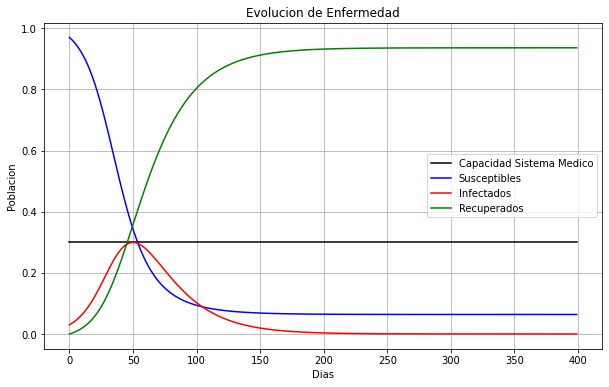

Máximo de infectados 0.29939
Máximo de infectados para que no sature el sistema medico es: 0.3
La epidemia durara 387 días 



In [11]:
import numpy as np
# Condiciones iniciales
S0=1-0.03
I0=0.03
R0 = 0
T0 = S0 + I0 + R0
x=[S0,I0,R0]
h = 1
tiempo=(0,400)
N=tiempo[-1]

Resultados =np.array(np.zeros((3, N)))

S=[]
I=[]
R=[]
M=[0.3*T0]*N

# Grafico Evolución de Epidemia modificando beta 
beta = 0.125
gamma = 0.043

Resultados = RK4(x , h,tiempo ,beta,gamma)

S=Resultados[0]
I=Resultados[1]
R=Resultados[2]

#print (I)

print("Grafico Evolución de Epidemia modificando la tasa de contacto ")

graficar_curvas(I,S,R,M)

#amplitud del pico
max_infect=max(I)
print("Máximo de infectados",round(max_infect,5))
print("Máximo de infectados para que no sature el sistema medico es:", 0.3*T0)


duracion=duracion_epidemia(I,N)
print("La epidemia durara", duracion, "días \n")



Grafico Evolución de Epidemia modificando la tasa de recuperación 


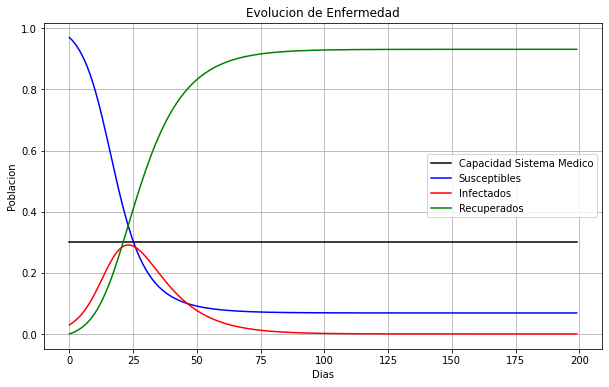

Máximo de infectados 0.29132
Máximo de infectados para que no sature el sistema medico es: 0.3
La epidemia durara 178 días


In [12]:
import numpy as np
# Condiciones iniciales
S0=1-0.03
I0=0.03
R0 = 0
T0 = S0 + I0 + R0
x=[S0,I0,R0]
h = 1
tiempo=(0,200)
N= tiempo[-1]

Resultados =np.array(np.zeros((3, N)))

S=[]
I=[]
R=[]
M=[0.3*T0]*N

# Grafico Evolución de Epidemia modificando gamma 
beta = 0.27
gamma = 0.095


Resultados = RK4(x , h, tiempo,beta,gamma)

S=Resultados[0]
I=Resultados[1]
R=Resultados[2]

#print (I)

print("Grafico Evolución de Epidemia modificando la tasa de recuperación ")

graficar_curvas(I,S,R,M)

#amplitud del pico
max_infect=max(I)
print("Máximo de infectados",round(max_infect,5))
print("Máximo de infectados para que no sature el sistema medico es:", 0.3*T0)


duracion=duracion_epidemia(I,N)
print("La epidemia durara", duracion, "días")

Con un valor de beta de $\beta$ = 0.125 el sistema medico no colapsa y la epidemia tendria una duracion de ---387---

Mientras que con un valor de $\gamma$ =0.095 el sistema medico no colapsa y la epidemia tendria una duracion de ---178--- dias, mucho menor que la anterior

#Graficos Con Nuevos Parametros


 CASO 1 



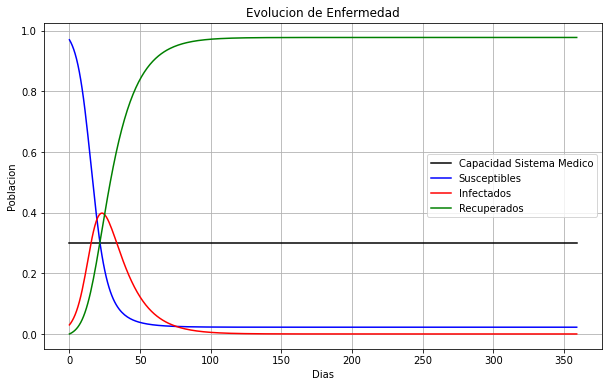

La epidemia durara 209 días
Máximo de infectados 0.39866

 CASO 2 



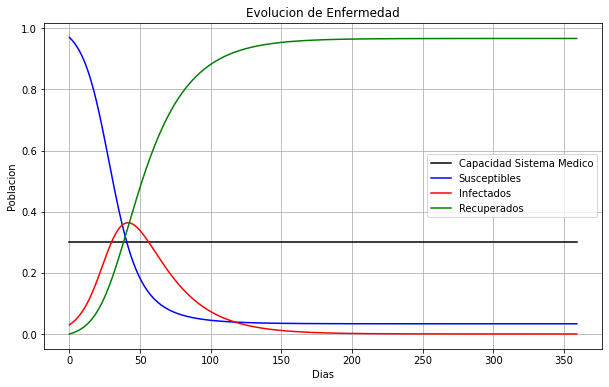

La epidemia durara 354 días
Máximo de infectados 0.36382

 CASO 3 



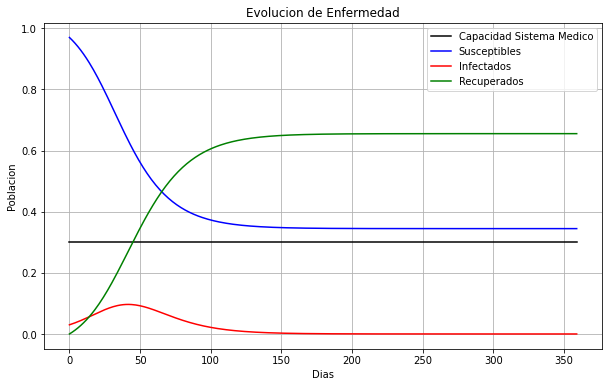

La epidemia durara 296 días
Máximo de infectados 0.09666


In [13]:
# Simulacion de un modelo de epidemias SIR
import numpy as np

S0=1-0.03
I0=0.03
R0 = 0
T0 = S0 + I0 + R0
x=[S0,I0,R0]
h = 1
tiempo=(0,360)
N = tiempo[-1]

Resultados =np.array(np.zeros((3, N)))

S=[]
I=[]
R=[]
M=[0.3*T0]*N

#------------------------------------------------------------

# Caso 1 

beta = 0.27
gamma = 0.07

Resultados = RK4(x , h, tiempo,beta, gamma)

S=Resultados[0]
I=Resultados[1]
R=Resultados[2]

print("\n CASO 1 \n")

graficar_curvas(I,S,R,M)
duracion=duracion_epidemia(I,N)
print("La epidemia durara", duracion, "días")

max_infect=max(I)
print("Máximo de infectados",round(max_infect,5))


# Caso 2

beta = 0.15
gamma = 0.043

Resultados = RK4(x , h, tiempo,beta, gamma)

S=Resultados[0]
I=Resultados[1]
R=Resultados[2]

print("\n CASO 2 \n")

graficar_curvas(I,S,R,M)
duracion=duracion_epidemia(I,N)
print("La epidemia durara", duracion, "días")
max_infect=max(I)
print("Máximo de infectados",round(max_infect,5))

# Caso 3 
bete = 0.125
gamma= 0.095

Resultados = RK4(x , h, tiempo ,beta,gamma)

S=Resultados[0]
I=Resultados[1]
R=Resultados[2]

print("\n CASO 3 \n")

graficar_curvas(I,S,R,M)
duracion=duracion_epidemia(I,N)
print("La epidemia durara", duracion, "días")
max_infect=max(I)
print("Máximo de infectados",round(max_infect,5))

##Analisis de cada uno de los casos

En el caso 1 manteniendo constante el valor de beta en 0.27 y aumentando el valor de gamma de 0.043 a 0.06 se puede observar que disminuye el pico de la curva de infectados de 0.55282 a 0.39866 y la duracion de la epidemia seria de 209 dias en vez de 387 dias

En el caso 2 manteniendo constante el valor de gamma en 0.043 y disminuyendo el valor de beta de 0.27 a 0.15 el pico de la curva de infectados disminuye a 0.36382 y la duracion de la epidemia es de 354 dias

En el caso 3 modifico ambos parametros al valor en el cual no se saturaba el sistema medico en los primeros graficos, y disminuye significativamente el pico de la curva de infectados a 0.09666 , y se obtiene una duracion de la epidemia a 296 dias

Luego de observar todos los casos, podemos concluir que la forma más eficiente de reducir el pico de la curva de infectados es aumentando el valor de $ \gamma$, y si se llega hasta el valor de 0.095 no solo no se satura el sistema medico, sino que a su vez se obtiene una duracion de epidemia de 178 dias. 

Con este valor de $ \gamma$, el período de recuperación promedio es de aproximadamente 11 dias, lo que no es un valor muy diferente a la realidad que estamos atravesando